# Análise Exploratória - Projeto 3

___
<div id="indice">

## Índice

- [Bibliotecas utilizadas](#biblio)
- [Importação da base de dados](#base-dados)
1. [Escolaridade e Rendimento](#esc-bruto)
2. [Distribuição Salarial por Faixa de Rendimento](#salario-faixa)
3. [Análise por Sexo e Cor/Raça](#sexo-cor)
4. [Análise por Idade](#idade)
5. [Distribuição de Ocupação](ocupa)
6. [Considerações Finais](#finais)

___
<div id="biblio"></div>

## Importação de bibliotecas utilizadas

In [50]:
# importações
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

___
<div id="base-dados"></div>

## Importação da base de dados e criação de variáveis:

[Índice](#indice)

In [51]:
dados = pd.read_csv("pnad23_filtrado.csv")

In [52]:
dados.head(5)

,Estado,Sexo,Idade,Cor_ou_Raça,Escolaridade,Ocupação,Faixa_de_rendimento,Rendimento_Bruto
0,Rondônia,Homem,30,Parda,Regular do ensino médio ou do 2º grau,Conta Própria,[3SM]+1 a [5SM],5000.0
1,Rondônia,Mulher,50,Parda,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3500.0
2,Rondônia,Mulher,54,Branca,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3700.0
3,Rondônia,Homem,36,Parda,Regular do ensino fundamental ou do 1º grau,Conta Própria,[2SM]+1 a [3SM],3300.0
4,Rondônia,Homem,33,Branca,Regular do ensino médio ou do 2º grau,Conta Própria,[2SM]+1 a [3SM],3500.0


In [53]:
dados.Escolaridade.head(5)

0          Regular do ensino médio ou do 2º grau
1                           Superior - graduação
2                           Superior - graduação
3    Regular do ensino fundamental ou do 1º grau
4          Regular do ensino médio ou do 2º grau
Name: Escolaridade, dtype: object

In [54]:
display(pd.Series(dados.columns).to_frame())

,0
0,Estado
1,Sexo
2,Idade
3,Cor_ou_Raça
4,Escolaridade
5,Ocupação
6,Faixa_de_rendimento
7,Rendimento_Bruto


In [55]:
dados.dtypes

Estado                  object
Sexo                    object
Idade                    int64
Cor_ou_Raça             object
Escolaridade            object
Ocupação                object
Faixa_de_rendimento     object
Rendimento_Bruto       float64
dtype: object

In [56]:
dados['Ocupação'] = dados.Ocupação.replace("Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar", "Militar")
dados['Ocupação'] = dados['Ocupação'].replace("Empregado do setor público (inclusive empresas de economia mista)", "Empregado do setor público")

___
<div id="esc-bruto"></div>

## Análise de relação de Escolaridade X Rendimento Bruto

[Índice](#indice)

In [57]:
dados["Escolaridade"]

0               Regular do ensino médio ou do 2º grau
1                                Superior - graduação
2                                Superior - graduação
3         Regular do ensino fundamental ou do 1º grau
4               Regular do ensino médio ou do 2º grau
                             ...                     
175176                           Superior - graduação
175177                           Superior - graduação
175178               Especialização de nível superior
175179                           Superior - graduação
175180                           Superior - graduação
Name: Escolaridade, Length: 175181, dtype: object

In [58]:
dados["Rendimento_Bruto"]

0          5000.0
1          3500.0
2          3700.0
3          3300.0
4          3500.0
           ...   
175176     5000.0
175177     3500.0
175178    10000.0
175179     5000.0
175180     5000.0
Name: Rendimento_Bruto, Length: 175181, dtype: float64

In [59]:
# Calculando média para cada tipo de escolaridade
media_salario = dados.groupby("Escolaridade")["Rendimento_Bruto"].mean()
media_salario.to_frame()

,Rendimento_Bruto
Escolaridade,
Alfabetização de jovens e adultos,1166.118881
"Antigo científico, clássico, etc. (médio 2º ciclo)",3239.437500
Antigo ginásio (médio 1º ciclo),2135.835387
Antigo primário (elementar),1720.580989
Classe de alfabetização - CA,993.057121
Creche (disponível apenas no questionário anual de educação),920.000000
Doutorado,11534.009063
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,1505.987119
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1937.792736


In [60]:
# Calculando mediana para cada tipo de escolaridade
mediana_salario = dados.groupby("Escolaridade")["Rendimento_Bruto"].median()
mediana_salario.to_frame()

,Rendimento_Bruto
Escolaridade,
Alfabetização de jovens e adultos,960.0
"Antigo científico, clássico, etc. (médio 2º ciclo)",2000.0
Antigo ginásio (médio 1º ciclo),1500.0
Antigo primário (elementar),1320.0
Classe de alfabetização - CA,700.0
Creche (disponível apenas no questionário anual de educação),600.0
Doutorado,10000.0
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,1320.0
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1500.0


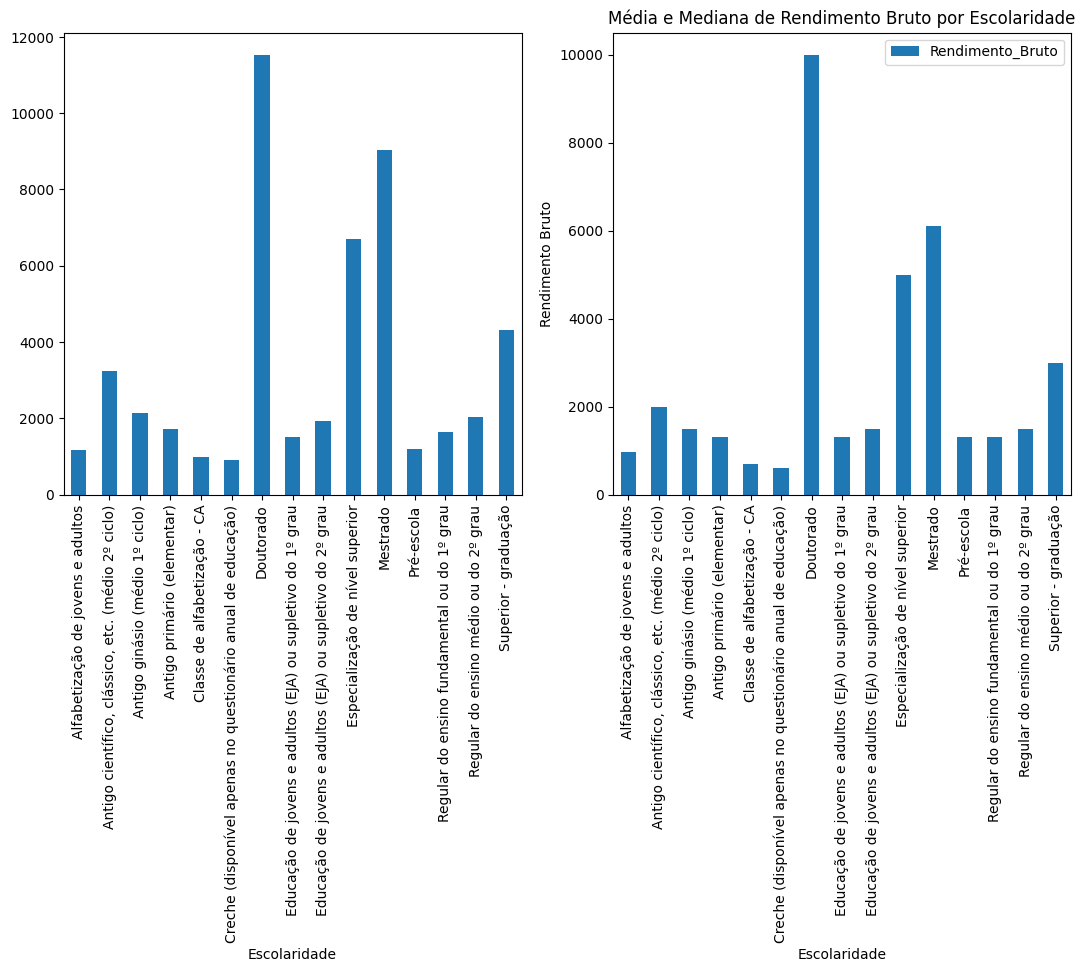

In [61]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
media_salario.plot(kind="bar")
plt.subplot(122)
mediana_salario.plot(kind="bar")
plt.xlabel("Escolaridade")
plt.ylabel("Rendimento Bruto")
plt.title("Média e Mediana de Rendimento Bruto por Escolaridade")
plt.legend()
plt.show()

<!-- ___
<div id="salario-faixa"></div>

## Distribuição Salarial por Faixa de Rendimento

[Índice](#indice) -->

___
<div id="sexo-cor"></div>

## Análise por Sexo e Cor/Raça

[Índice](#indice)

### Busca por valores aberrantes
Aqui será feita a busca por valores aberrantes e por amostras que possam alterar demais os resultados finais

### Dados de Raça

In [62]:
df_raca = dados["Cor_ou_Raça"]
df_raca.value_counts().to_frame()

,count
Cor_ou_Raça,
Parda,81604
Branca,73012
Preta,18564
Amarela,1161
Indigena,825
Ignorado,15


In [63]:
rend_raca = dados.groupby("Cor_ou_Raça")["Rendimento_Bruto"]
media_raca = rend_raca.mean().sort_values(ascending=False)
media_raca.to_frame()

,Rendimento_Bruto
Cor_ou_Raça,
Ignorado,8521.333333
Amarela,3636.186047
Branca,3452.221155
Parda,2098.726129
Preta,2058.074445
Indigena,1983.036364


### Remoção de valores aberrantes

Baseado na análise dos valores de rendimento bruto separado em sexo e raça, foi decidido remover os valores que marcaram "Ignorado" na coluna "Cor_ou_Raça", uma vez que esses representam uma parte muito pequena da quantidade total de dados, mas possuem uma média muito elevada de Rendimento Bruto

In [64]:
ignorados = dados["Cor_ou_Raça"] == "Ignorado"
dados_corrigidos = dados.drop(dados[ignorados].index)

In [65]:
media_raca_corrigida = (
    dados_corrigidos.groupby("Cor_ou_Raça")["Rendimento_Bruto"]
    .mean()
    .sort_values(ascending=False)
)
media_raca_corrigida.to_frame()

,Rendimento_Bruto
Cor_ou_Raça,
Amarela,3636.186047
Branca,3452.221155
Parda,2098.726129
Preta,2058.074445
Indigena,1983.036364


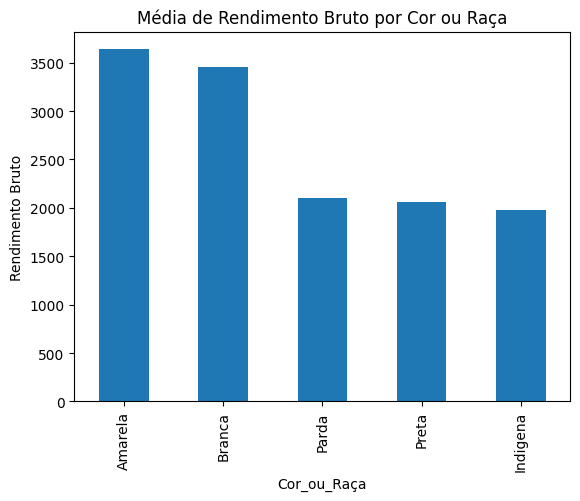

In [66]:
media_raca_corrigida.plot(kind="bar")
plt.title("Média de Rendimento Bruto por Cor ou Raça")
plt.ylabel("Rendimento Bruto")
plt.show()

### Dados de Sexo

In [67]:
dados["Sexo"].value_counts().to_frame()

,count
Sexo,
Homem,102907
Mulher,72274


In [68]:
df_sexo = dados.groupby("Sexo")["Rendimento_Bruto"]
media_sexo = df_sexo.mean()
media_sexo.to_frame()

,Rendimento_Bruto
Sexo,
Homem,2876.170941
Mulher,2373.349005


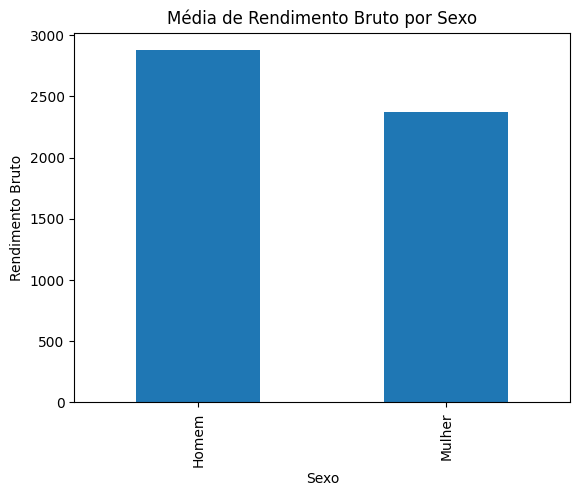

In [69]:
media_sexo.plot(kind="bar")
plt.title("Média de Rendimento Bruto por Sexo")
plt.ylabel("Rendimento Bruto")
plt.show()

___
<div id="idade"></div>

## Análise por Idade

[Índice](#indice)

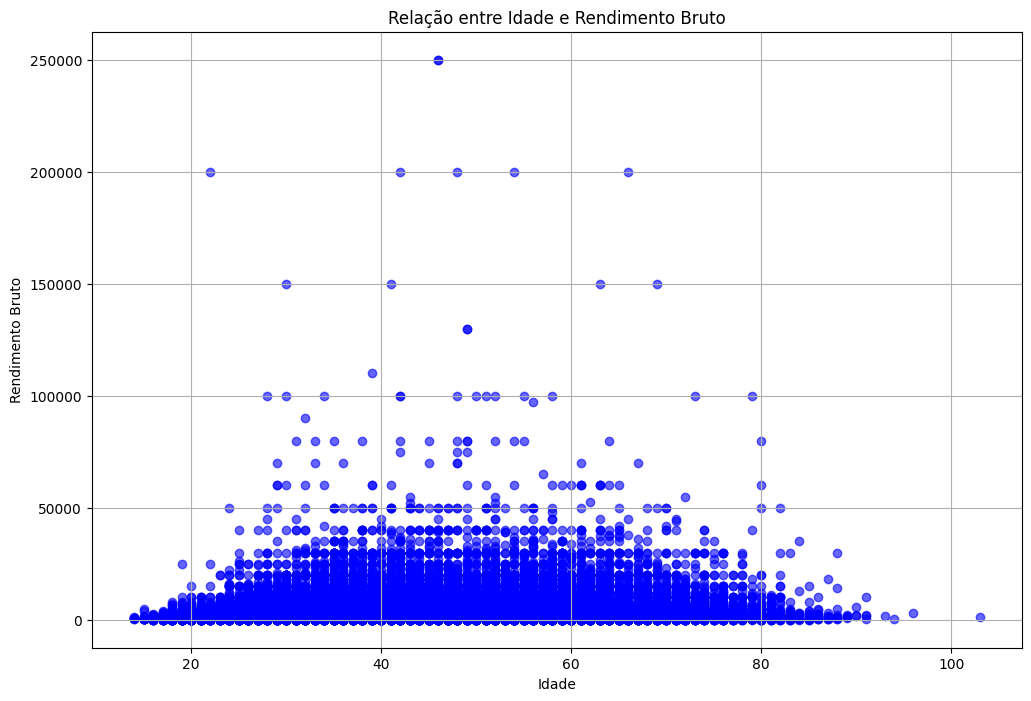

In [70]:
plt.figure(figsize=(12, 8))
plt.scatter(dados["Idade"], dados["Rendimento_Bruto"], color="Blue", alpha=0.6)

plt.title("Relação entre Idade e Rendimento Bruto")
plt.xlabel("Idade")
plt.ylabel("Rendimento Bruto")
plt.grid(True)
plt.show()

___
<div id="ocupa"></div>

## Distribuição por Ocupação

[Índice](#indice)

In [71]:
rendimento_ocupacao_media = dados.groupby("Ocupação")["Rendimento_Bruto"].mean()
rendimento_ocupacao_media.to_frame()

,Rendimento_Bruto
Ocupação,
Conta Própria,2134.233617
Empregado do setor privado,2343.454260
Empregado do setor público,4189.031607
Empregador,6932.884492
Militar,6369.334082
Trabalhador doméstico,1108.325629


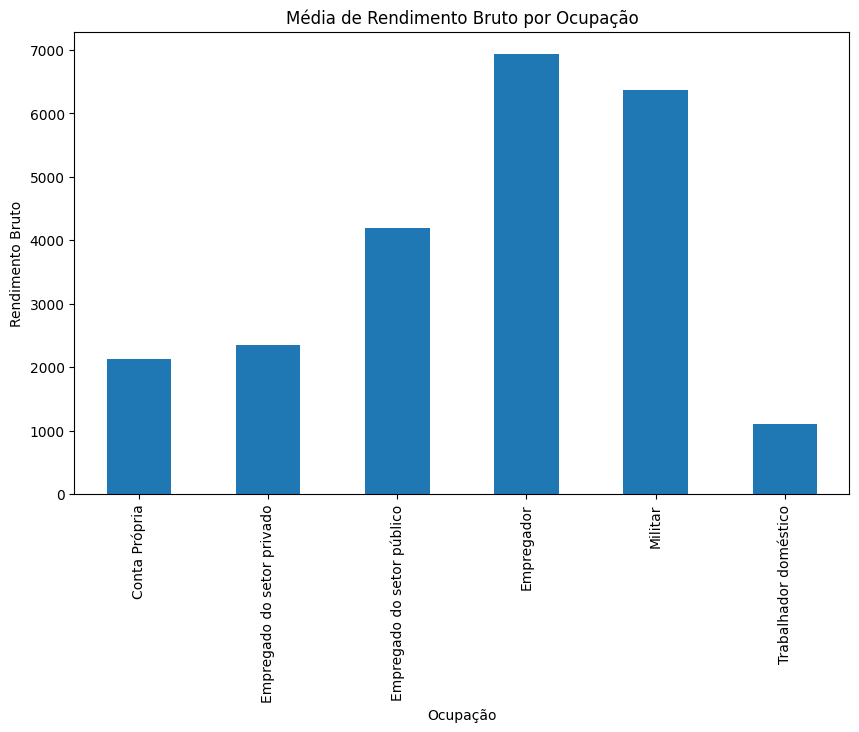

In [74]:
rendimento_ocupacao_media.plot(kind="bar", figsize=(10, 6))
plt.title("Média de Rendimento Bruto por Ocupação")
plt.ylabel("Rendimento Bruto")
plt.show()

___
<div id="finais"></div>

## Considerações Finais

[Índice](#indice)